In [4]:
import re
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Custom library for the project
import sys
sys.path.insert(0, '../../../src')
import harmoutil

%matplotlib inline

In [2]:
# # Remove when done with kernel
import importlib
importlib.reload(harmoutil)

<module 'harmoutil' from '../../../src/harmoutil.py'>

In [16]:
### Load raw data ###
raw_data = harmoutil.load_pickled_data("../../../data/refined_data.pkl") # lists of (chord label, melody seqs) by sections

### Augment data ###
augmented_data = harmoutil.transpose_and_augment_data(raw_data)

triads_data = [harmoutil.to_triads(section) for section in augmented_data]
sevenths_data = [harmoutil.to_sevenths(section) for section in augmented_data]

triads_data = [harmoutil.melody_to_octave_range(section) for section in triads_data]
sevenths_data = [harmoutil.melody_to_octave_range(section) for section in sevenths_data]

triads_chords = [ch for section in triads_data for ch, mel in section]
sevenths_chords = [ch for section in sevenths_data for ch, mel in section]

# triads_melodies_by_beats = [mel for section in triads_data for ch, mel in section]

# triads_melodies_by_notes = []
# for mel in melodies_by_beats:
#     melodies_by_notes.append([n for b in mel for n in b])
# notes = [n for sec in melodies_by_notes for n in sec]

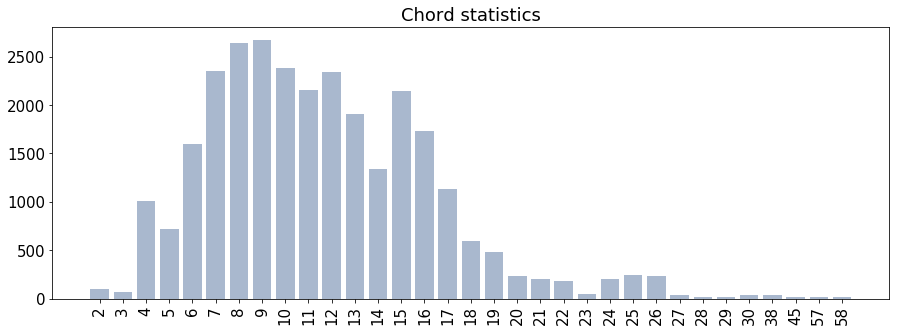

In [17]:
### Visualize classes statistics ###

matplotlib.rcParams.update({'font.size': 15})

chord_seq_lengths = [len(section) for section in triads_data]

plt.clf()

labels = sorted(list(set(chord_seq_lengths)))
x_axis = range(len(labels))
y_axis = [chord_seq_lengths.count(lab) for lab in labels]

seq_fig = plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.title('Chord statistics')
plt.show()
# seq_fig.savefig("seq-len.pdf", format='pdf')

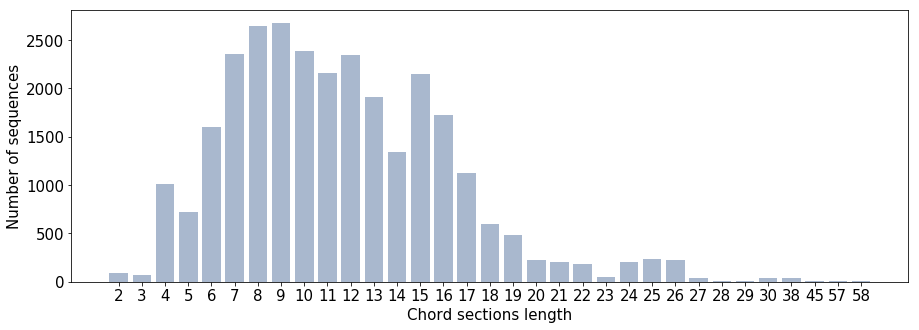

In [46]:
### Visualize classes statistics ###

matplotlib.rcParams.update({'font.size': 15})

chord_seq_lengths = [len(section) for section in sevenths_data]

plt.clf()

labels = sorted(list(set(chord_seq_lengths)))
x_axis = range(len(labels))
y_axis = [chord_seq_lengths.count(lab) for lab in labels]

seq_fig = plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
# plt.xticks(rotation='vertical')
plt.xlabel("Chord sections length")
plt.ylabel("Number of sequences")
# plt.title('Chord statistics')
plt.show()
seq_fig.savefig("seq-len.pdf", format='pdf')

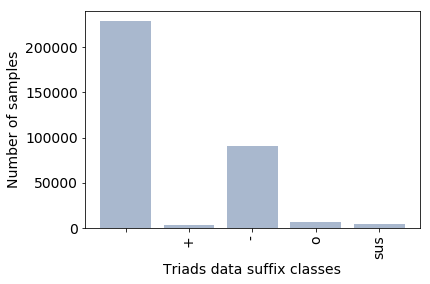

In [47]:
tr_roots, tr_suffixes = harmoutil.roots_and_suffixes(triads_chords)

matplotlib.rcParams.update({'font.size': 14})
plt.clf()

labels = sorted(list(set(tr_suffixes)))
x_axis = range(len(labels))
y_axis = [tr_suffixes.count(lab) for lab in labels]

tr_fig = plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.xlabel("Triads data suffix classes")
plt.ylabel("Number of samples")
# plt.title('Sevenths Data Suffixes distribution')
tr_fig.savefig("tr_distrib.pdf", format='pdf')

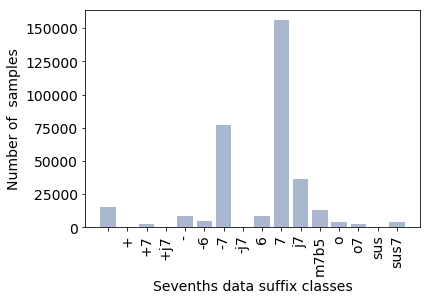

In [48]:
sv_roots, sv_suffixes = harmoutil.roots_and_suffixes(sevenths_chords)

matplotlib.rcParams.update({'font.size': 14})
plt.clf()

labels = sorted(list(set(sv_suffixes)))
x_axis = range(len(labels))
y_axis = [sv_suffixes.count(lab) for lab in labels]


sv_fig = plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.xlabel("Sevenths data suffix classes")
plt.ylabel("Number of  samples")
# plt.title('Triad suffixes distribution')
sv_fig.savefig("sv_distrib.pdf", format='pdf')

In [ ]:
chord_seq_lengths = [len(section) for section in triads_data]
tr_roots, tr_suffixes = harmoutil.roots_and_suffixes(triads_chords)
sv_roots, sv_suffixes = harmoutil.roots_and_suffixes(sevenths_chords)

plt.clf()


# cc len
labels = sorted(list(set(chord_seq_lengths)))
x_axis = range(len(labels))
y_axis = [chord_seq_lengths.count(lab) for lab in labels]

seq_fig = plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.title('Chord statistics')
plt.show()


# tri
labels = sorted(list(set(tr_suffixes)))
x_axis = range(len(labels))
y_axis = [tr_suffixes.count(lab) for lab in labels]

sfx_fig = plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.title('Chord suffixes distribution')

# sev
labels = sorted(list(set(sv_suffixes)))
x_axis = range(len(labels))
y_axis = [sv_suffixes.count(lab) for lab in labels]

sfx_fig = plt.bar(x_axis, y_axis, tick_label=labels, color='#a9b8ce')
plt.xticks(rotation='vertical')
plt.title('Chord suffixes distribution')
